## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os

## Data Preperation

In [2]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dataset.duplicated().sum()
dataset.shape

(768, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Set Independent and Dependent Values

In [23]:
selected_features = {'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'}
selected_features

{'Age',
 'BMI',
 'BloodPressure',
 'DiabetesPedigreeFunction',
 'Glucose',
 'Insulin',
 'Pregnancies',
 'SkinThickness'}

In [37]:
X = dataset[list(selected_features)]
y = dataset['Outcome'] # Targeted Values Selection

## Normalisasi

' pt = PowerTransformer()\nresult = pt.fit_transform(data)\ndata = pd.dataFrame(data=result, columns=data.columns)\ndata.hist(figsize=(8,8)); '

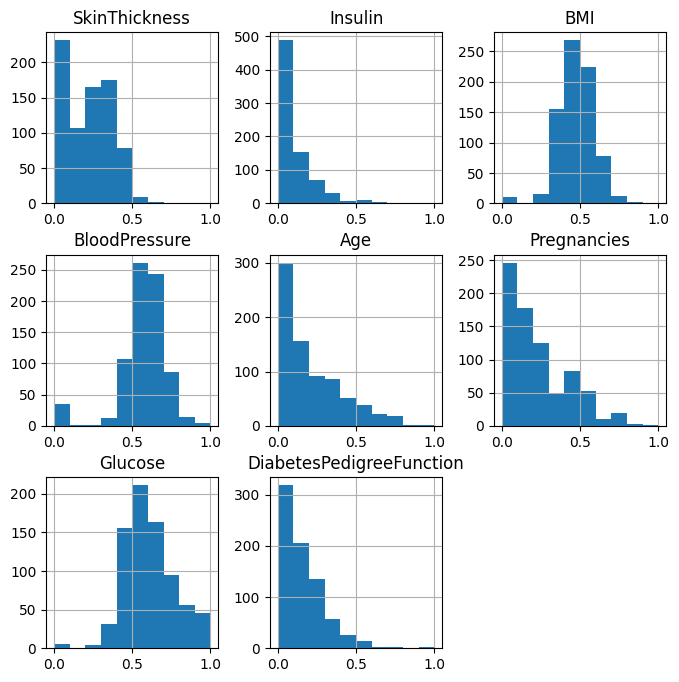

In [40]:
# Min-Max Normalization
# Min-Max = (x-min) / (max-min)
mms = MinMaxScaler()
result = mms.fit_transform(X)
data = pd.DataFrame(data=result, columns=X.columns)
data.hist(figsize=(8,8));

# Power Transform
""" pt = PowerTransformer()
result = pt.fit_transform(data)
data = pd.dataFrame(data=result, columns=data.columns)
data.hist(figsize=(8,8)); """

In [42]:
data.to_csv(r'data_normalisasi.csv', index = False, header = True, index_label=None)
data

,SkinThickness,Insulin,BMI,BloodPressure,Age,Pregnancies,Glucose,DiabetesPedigreeFunction
0,0.353535,0.000000,0.500745,0.590164,0.483333,0.352941,0.743719,0.234415
1,0.292929,0.000000,0.396423,0.540984,0.166667,0.058824,0.427136,0.116567
2,0.000000,0.000000,0.347243,0.524590,0.183333,0.470588,0.919598,0.253629
3,0.232323,0.111111,0.418778,0.540984,0.000000,0.058824,0.447236,0.038002
4,0.353535,0.198582,0.642325,0.327869,0.200000,0.000000,0.688442,0.943638
...,...,...,...,...,...,...,...,...
763,0.484848,0.212766,0.490313,0.622951,0.700000,0.588235,0.507538,0.039710
764,0.272727,0.000000,0.548435,0.573770,0.100000,0.117647,0.613065,0.111870
765,0.232323,0.132388,0.390462,0.590164,0.150000,0.294118,0.608040,0.071307
766,0.000000,0.000000,0.448584,0.491803,0.433333,0.058824,0.633166,0.115713


## Splitting the dataset into the Training set and Test set

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Feature Scaling

In [44]:
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Create Model LVQ

In [45]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [46]:
n_input = X_train.shape[1]
n_output = len(np.unique(y_train))

print('Input Neuron:', n_input)
print('Output Neuron:', n_output)

Input Neuron: 8
Output Neuron: 2


## Classification

In [47]:
class LVQ(object):

    def __init__(self, sizeInput, sizeOutput, max_epoch, learning_rate, fungsi_pembelajaran):
        """
        Inisialisasi class (constructor)
        :param sizeInput (int): Banyaknya input neuron sesuai dengan banyaknya parameter (fitur pada data latih)
        :param sizeOutput (int): Banyaknya output neuron sesuai dengan banyaknya label (kelas pada data latih)
        :param max_epoch (int): Maksimal epoch yang diizinkan
        :param alpha (float): learning rate
        """

        self.sizeInput = sizeInput
        self.sizeOutput = sizeOutput
        self.max_epoch = max_epoch
        self.alpha = learning_rate
        self.fungsi_pembelajaran = fungsi_pembelajaran
        self.weight = np.zeros((sizeOutput, sizeInput))

    def getWeight(self):
        """
        Mendapatkan bobot jaringan LVQ setelah proses training

        :return: weight (nilai bobot)
        """

        return self.weight

    def getAlpha(self):
        return self.alpha
    
    def train(self,train_data,train_target):
        """
        Proses pelatihan jaringan LVQ
        :param train_data (numpy array atau pandas dataframe): Matriks yang berisi data latih
        :param train_target (numpy array atau pandas series): Array yang berisi label dari data latih
        :return: bobot dan label dari bobot
        """
        
        weight_label, label_index = np.unique(train_target, True)
        # print('weight label = ', weight_label)
        # print('index label = ', label_index)
        
        # Inisialisasi bobot
        self.weight = train_data[label_index].astype(np.float64)
        print("Inisialisasi bobot:",self.weight)
        
        # Hapus data yang digunakan untuk inisialisasi bobot
        train_data = np.delete(train_data, label_index, axis=0)
        train_target = np.delete(train_target, label_index, axis=0)
        
        epoch = 0
        iterasi = 0
        
        while epoch <= self.max_epoch:
            epoch += 1
            # print('\nEpoch', epoch)
            for data, target in zip(train_data, train_target):
                iterasi += 1
                # print('Iterasi', iterasi)
                distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
                # print("Jarak:", distance)
                idx_min = np.argmin(distance)
                # print("Jarak terkecil pada bobot ke", idx_min)
                
                if target == weight_label[idx_min]:
                    self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                else:
                    self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])
        
            self.alpha = self.alpha - (self.fungsi_pembelajaran * self.alpha)
            
        weight_class = (self.weight, weight_label)
        return weight_class

    def test(self, test_data, weight_class):
        """
        Proses pengujian jaringan LVQ
        :param test_data (numpy array atau pandas dataframe): Matriks yang berisi data uji
        :param weight_class (tuple): Tuple yang berisi pasangan bobot dan labelnya
        :return: Nilai prediksi label/class
        """

        weight, label = weight_class
        output = []
        for data in test_data:
            distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
            idx_min = np.argmin(distance)
            output.append(label[idx_min])
        return output

## Train Model LVQ

In [48]:
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=50, learning_rate=0.01, fungsi_pembelajaran=0.1)
bobot_dan_label = lvq.train(X_train, y_train)
bobot = lvq.getWeight()
print('Bobot Akhir: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Inisialisasi bobot: [[0.27272727 0.02600473 0.44113264 0.63934426 0.37254902 0.29411765
  0.63316583 0.17251462]
 [0.41414141 0.15248227 0.53353204 0.50819672 0.07843137 0.29411765
  0.54773869 0.20906433]]
Bobot Akhir:  [[0.19745046 0.0749006  0.42608334 0.54948918 0.11039297 0.14222597
  0.49585067 0.14760672]
 [0.28470963 0.18301258 0.60303472 0.59129454 0.26525886 0.35616165
  0.89768923 0.2990103 ]]
Ukuran Bobot: (2, 8)


## Model Evaluation

Accuracy: 0.7445887445887446


<AxesSubplot: >

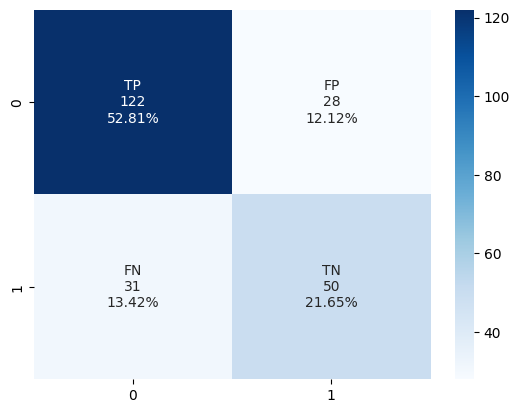

In [49]:
y_pred = lvq.test(X_test, bobot_dan_label)
print('Accuracy:', accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['TP','FP','FN','TN']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       150
           1       0.64      0.62      0.63        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Testing

In [51]:
data_train, data_test = train_test_split(X,test_size=0.3, random_state=101)
data_test['Target'] = y_test
data_test['Hasil_prediksi'] = y_pred
data_test['Keterangan'] = np.where(data_test['Target'] == data_test['Hasil_prediksi'], 'Benar', 'Salah')
data_test.to_csv(r'dataTest_klasifikasi.csv', index = False, header = True, index_label=None)
data_test

,SkinThickness,Insulin,BMI,BloodPressure,Age,Pregnancies,Glucose,DiabetesPedigreeFunction,Target,Hasil_prediksi,Keterangan
766,0,0,30.1,60,47,1,126,0.349,1,0,Salah
748,22,200,36.4,70,36,3,187,0.408,1,1,Benar
42,18,0,22.7,92,48,7,106,0.235,0,0,Benar
485,42,250,42.3,68,24,0,135,0.365,1,0,Salah
543,23,56,39.5,90,25,4,84,0.159,0,0,Benar
...,...,...,...,...,...,...,...,...,...,...,...
188,39,114,27.9,76,31,8,109,0.640,1,0,Salah
8,45,543,30.5,70,53,2,197,0.158,1,1,Benar
645,35,440,39.4,74,30,2,157,0.134,0,1,Salah
381,22,0,20.0,68,22,0,105,0.236,0,0,Benar
